In [1]:
import os, time
from scipy import stats
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
os.getcwd()

'E:\\soundcast_ext\\soundcast\\scripts\\summarize\\notebooks'

In [3]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Fri, 27 Mar 2020 15:47


In [4]:
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format
relative_path = '../../../outputs'

# Commute Mode by Workplace Geography

In [5]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_workplace_geog.csv'))
df

,work_place,mode,modeled,observed,percent_diff,diff
0,Auburn,auto,33422,33431,-0,-9
1,Auburn,transit,521,691,-0,-170
2,Auburn,walk_and_bike,1491,1355,0,136
3,Bellevue,auto,88757,96761,-0,-8004
4,Bellevue,transit,3673,12505,-1,-8832
5,Bellevue,walk_and_bike,6618,6464,0,154
6,Everett,auto,62661,81741,-0,-19080
7,Everett,transit,1003,2766,-1,-1763
8,Everett,walk_and_bike,4189,3961,0,228
9,Federal Way,auto,22239,27590,-0,-5351


r^2 : 0.908471348108


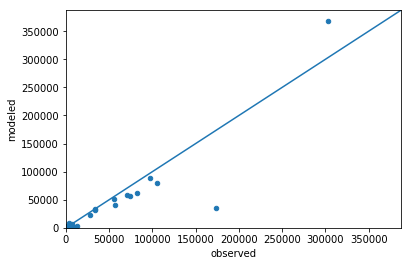

In [6]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Shares by Work Place
----

In [7]:
df_tot = df.groupby(['work_place']).sum()[['modeled','observed']].reset_index()
df_shares = df.merge(df_tot, on='work_place', suffixes=['','_total'])
df_shares['mode_share_modeled'] = df_shares['modeled']/df_shares['modeled_total']
df_shares['mode_share_observed'] = df_shares['observed']/df_shares['observed_total']
df_shares.rename(columns={'mode_share_modeled': 'modeled', 'mode_share_observed': 'observed',
                         'modeled': '_', 'observed': '__'}, inplace=True)
df_shares = df_shares[['work_place','modeled','observed','mode']]
df_shares['percent_diff'] = (df_shares['modeled']-df_shares['observed'])/df_shares['observed']
df_shares['diff'] = df_shares['modeled']-df_shares['observed']

## Auto

In [8]:
_df = df_shares[df_shares['mode'] == 'auto']
_df

,work_place,modeled,observed,mode,percent_diff,diff
0,Auburn,1,1,auto,0,0
3,Bellevue,1,1,auto,0,0
6,Everett,1,1,auto,-0,-0
9,Federal Way,1,1,auto,-0,-0
12,Kent,1,1,auto,0,0
15,Kirkland,1,1,auto,0,0
18,Redmond,1,1,auto,0,0
21,Renton,1,1,auto,0,0
24,Seattle,1,1,auto,0,0
27,Tacoma,1,1,auto,-0,-0


r^2 : 0.911108777592


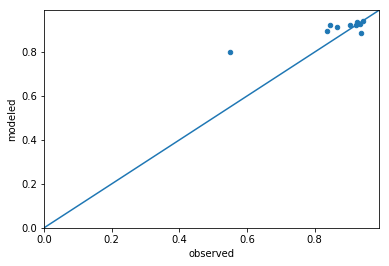

In [9]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Transit

In [10]:
_df = df_shares[df_shares['mode'] == 'transit']
_df

,work_place,modeled,observed,mode,percent_diff,diff
1,Auburn,0,0,transit,-0,-0
4,Bellevue,0,0,transit,-1,-0
7,Everett,0,0,transit,-1,-0
10,Federal Way,0,0,transit,4,0
13,Kent,0,0,transit,-1,-0
16,Kirkland,0,0,transit,-1,-0
19,Redmond,0,0,transit,-1,-0
22,Renton,0,0,transit,-0,-0
25,Seattle,0,0,transit,-1,-0
28,Tacoma,0,0,transit,-0,-0


r^2 : 0.964353959385


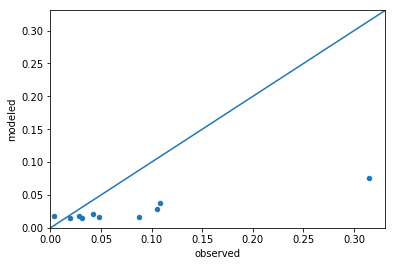

In [11]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

## Walk and Bike

In [12]:
_df = df_shares[df_shares['mode'] == 'walk_and_bike']
_df

,work_place,modeled,observed,mode,percent_diff,diff
2,Auburn,0,0,walk_and_bike,0,0
5,Bellevue,0,0,walk_and_bike,0,0
8,Everett,0,0,walk_and_bike,0,0
11,Federal Way,0,0,walk_and_bike,-0,-0
14,Kent,0,0,walk_and_bike,1,0
17,Kirkland,0,0,walk_and_bike,1,0
20,Redmond,0,0,walk_and_bike,0,0
23,Renton,0,0,walk_and_bike,0,0
26,Seattle,0,0,walk_and_bike,-0,-0
29,Tacoma,0,0,walk_and_bike,2,0


r^2 : 0.740228374009


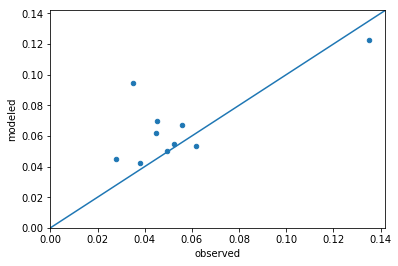

In [13]:
ax = _df.plot(kind='scatter', x='observed', y='modeled')
lim = _df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
print 'r^2 : ' + str(r_value)

# Commute Mode Share by Home Tract
----

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation','acs_commute_share_by_home_tract.csv'))


In [15]:
df_county = df.groupby('CountyName').sum()[['modeled','observed']].reset_index()
df_county

,CountyName,modeled,observed
0,King,"989,672","1,045,669"
1,Kitsap,"91,118","111,666"
2,Pierce,"229,450","365,087"
3,Snohomish,"227,004","366,992"


In [16]:
def calculate_shares(df, geog_col, apply_format=False):
    
    df[['modeled','observed']] = df[['modeled','observed']].astype('int')
    df_total = df.groupby(geog_col).sum()[['modeled','observed']].reset_index()
    df_total.rename(columns={'modeled': 'modeled_total','observed':'observed_total'}, inplace=True)
    df = df.merge(df_total, on=geog_col, how='left')
    df['modeled_share'] = df['modeled']*1.0/df['modeled_total']
    df['observed_share'] = df['observed']*1.0/df['observed_total']
    if apply_format:
        df[['modeled_share','observed_share']] = df[['modeled_share','observed_share']].applymap(format_percent)
    
    return df

In [17]:
df_county_mode = df.groupby(['CountyName','mode']).sum()[['modeled','observed']].reset_index()
df_county_mode = calculate_shares(df_county_mode, 'CountyName', apply_format=True)
# Shares by Tract
df_tract = df[['geoid','mode','modeled','observed']]
df_tract_shares = calculate_shares(df_tract, 'geoid')

C:\Anaconda\envs\model\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


 r^2: 0.627193200442


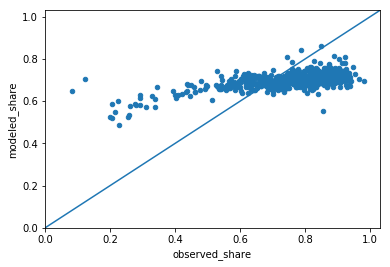

In [18]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'SOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

 r^2: 0.11485694236


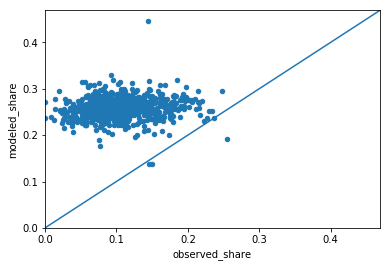

In [19]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'HOV']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

 r^2: 0.636756500206


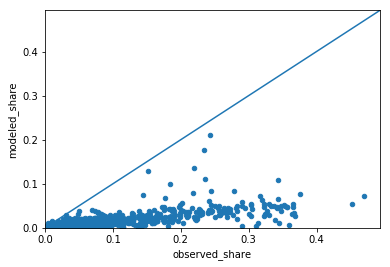

In [20]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Transit']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

 r^2: 0.608460161227


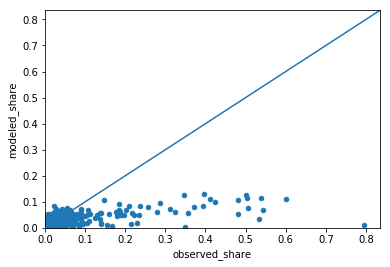

In [21]:
# Show only SOV
sov_tract_shares = df_tract_shares[df_tract_shares['mode'] == 'Walk']
sov_tract_shares = sov_tract_shares[-sov_tract_shares.observed_share.isnull()]

_df = sov_tract_shares.copy()
ax = _df.plot(kind='scatter', x='observed_share', y='modeled_share')
lim = _df[['observed_share','modeled_share']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_share'],_df['modeled_share'])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
print ' r^2: ' + str(r_value)

# Commute Flow
----

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation','district_worker_flows.csv'))

r^2 : 0.992175255883


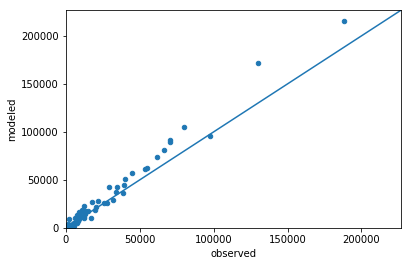

In [23]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

Modeled

In [24]:
df_m = pd.pivot_table(df, index='District_o', columns='District_d', values='modeled').reset_index()
df_m

District_d,District_o,1,2,3,4,5,6,7,8,9,10,11
0,1,"91,575","61,949","13,792","10,086","2,531","42,983","2,182",52,14,59,nan
1,2,"17,428","73,941","18,006","11,174","2,605","17,366","1,534",47,41,22,1
2,3,"3,330","11,371","81,444","60,860","11,493","18,557","5,188",153,22,120,nan
3,4,440,"1,438","22,647","88,982","14,141","10,208","5,349",145,15,90,1
4,5,276,773,"9,765","37,363","44,993","12,210","27,065","1,192",79,658,27
5,6,"9,743","9,429","18,504","36,574","14,300","215,794","28,429",764,22,823,7
6,7,447,719,"6,989","26,150","25,641","28,613","171,960","13,509",82,"13,856",132
7,8,22,62,699,"2,714","2,203","1,621","16,779","57,276",284,"22,169",740
8,9,6,33,126,"1,072",179,72,118,324,"104,836",120,"4,174"
9,10,78,108,"1,298","5,046","4,099","4,294","42,099","51,234",291,"95,899",940


Observed

In [25]:
df_o = pd.pivot_table(df, index='District_o', columns='District_d', values='observed').reset_index()
df_o

District_d,District_o,1,2,3,4,5,6,7,8,9,10,11
0,1,"70,611","54,721","8,918","12,011","4,306","29,472","4,840",344,261,473,nan
1,2,"15,234","61,446","11,647","11,955","3,255","12,574","3,489",201,340,296,10
2,3,"3,151","9,453","66,117","53,446","11,591","19,816","7,768",459,343,361,nan
3,4,580,"2,025","11,996","70,449","8,607","16,628","5,284",520,159,274,10
4,5,555,"1,196","7,322","34,107","39,032","11,594","17,311","1,327",168,517,69
5,6,"5,873","8,517","10,654","38,816","13,125","188,214","21,988",987,228,993,28
6,7,780,"2,619","8,182","27,571","25,502","31,684","129,832","7,790",281,"9,139",255
7,8,115,271,728,"3,749","2,435","2,484","13,195","44,748",753,"20,054","1,525"
8,9,64,691,783,"4,958","2,014","1,306","1,809","2,328","80,004","1,180","1,621"
9,10,270,669,"1,386","5,725","5,321","4,515","34,551","39,995","1,186","97,602","1,347"


Difference

In [26]:
df_m - df_o

District_d,District_o,1,2,3,4,5,6,7,8,9,10,11
0,0,"20,964","7,228","4,874","-1,925","-1,775","13,511","-2,658",-292,-247,-414,nan
1,0,"2,194","12,495","6,359",-781,-650,"4,792","-1,955",-154,-299,-274,-9
2,0,179,"1,918","15,327","7,414",-98,"-1,259","-2,580",-306,-321,-241,nan
3,0,-140,-587,"10,651","18,533","5,534","-6,420",65,-375,-144,-184,-9
4,0,-279,-423,"2,443","3,256","5,961",616,"9,754",-135,-89,141,-42
5,0,"3,870",912,"7,850","-2,242","1,175","27,580","6,441",-223,-206,-170,-21
6,0,-333,"-1,900","-1,193","-1,421",139,"-3,071","42,128","5,719",-199,"4,717",-123
7,0,-93,-209,-29,"-1,035",-232,-863,"3,584","12,528",-469,"2,115",-785
8,0,-58,-658,-657,"-3,886","-1,835","-1,234","-1,691","-2,004","24,832","-1,060","2,553"
9,0,-192,-561,-88,-679,"-1,222",-221,"7,548","11,239",-895,"-1,703",-407


Percent Difference

In [27]:
pd.options.display.float_format = '{:0,.2f}'.format
(df_m - df_o)/df_o

District_d,District_o,1,2,3,4,5,6,7,8,9,10,11
0,0.00,0.30,0.13,0.55,-0.16,-0.41,0.46,-0.55,-0.85,-0.95,-0.88,nan
1,0.00,0.14,0.20,0.55,-0.07,-0.20,0.38,-0.56,-0.77,-0.88,-0.93,-0.90
2,0.00,0.06,0.20,0.23,0.14,-0.01,-0.06,-0.33,-0.67,-0.94,-0.67,nan
3,0.00,-0.24,-0.29,0.89,0.26,0.64,-0.39,0.01,-0.72,-0.91,-0.67,-0.90
4,0.00,-0.50,-0.35,0.33,0.10,0.15,0.05,0.56,-0.10,-0.53,0.27,-0.61
5,0.00,0.66,0.11,0.74,-0.06,0.09,0.15,0.29,-0.23,-0.90,-0.17,-0.75
6,0.00,-0.43,-0.73,-0.15,-0.05,0.01,-0.10,0.32,0.73,-0.71,0.52,-0.48
7,0.00,-0.81,-0.77,-0.04,-0.28,-0.10,-0.35,0.27,0.28,-0.62,0.11,-0.51
8,0.00,-0.91,-0.95,-0.84,-0.78,-0.91,-0.94,-0.93,-0.86,0.31,-0.90,1.57
9,0.00,-0.71,-0.84,-0.06,-0.12,-0.23,-0.05,0.22,0.28,-0.75,-0.02,-0.30
